In [2]:
import pandas as pd
import numpy as np
from math import pi
from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sns
import os
path = os.getcwd()

In [3]:
def createBG(categories):
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, polar=True)
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], categories)
    
    ax.set_rlabel_position(0)
    plt.yticks([65, 130, 195], color="grey", size=7)
    plt.ylim(0, 260)

    return (angles, ax)

In [4]:
def plot_spider(*id, comp = False):
    pokedex = pd.read_csv(f"{path}\Dataframe\pokedex.csv").set_index("id")

    categories = ["HP", "Atk", "Def", "SpAtk", "SPDef", "Spd"]
    angles, ax = createBG(categories)

    if type(id[0]) == int:
        
        values = pokedex.loc[id[0]][categories].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label = pokedex.loc[id[0]]["Name"])
        ax.fill(angles, values, 'b', alpha=0.1)
    else:
        if id[1] == "Type2":
            comp_df = pokedex[pokedex["Type1"] == id[0]]
        else:
            comp_df = pokedex[pokedex[id[1]] == id[0]]
        cat_comp_mean = dict(comp_df[categories].mean())
        mean_plot = pd.DataFrame(cat_comp_mean, index = [0])
        values = mean_plot[categories].values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values,"r", linewidth=1, linestyle='solid', label=id[0])
        ax.fill(angles, values, 'r', alpha=0.1)

    if comp:
        indexes = list(pokedex)
        del indexes[0:9]
        if type(id[1]) == int:
            values = pokedex.loc[id[1]][categories].values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1, linestyle='solid', label = pokedex.loc[id[1]]["Name"])
            ax.fill(angles, values, 'r', alpha=0.1)

        elif id[1] in indexes:
            searchid = pokedex.loc[id[0]][id[1]]
            if id[1] == "Type2":
                comp_df = pokedex[pokedex["Type1"] == searchid]
            else:
                comp_df = pokedex[pokedex[id[1]] == searchid]
            cat_comp_mean = dict(comp_df[categories].mean())
            mean_plot = pd.DataFrame(cat_comp_mean, index = [0])
            values = mean_plot[categories].values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1, linestyle='solid', label=searchid)
            ax.fill(angles, values, 'r', alpha=0.1)

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()
    


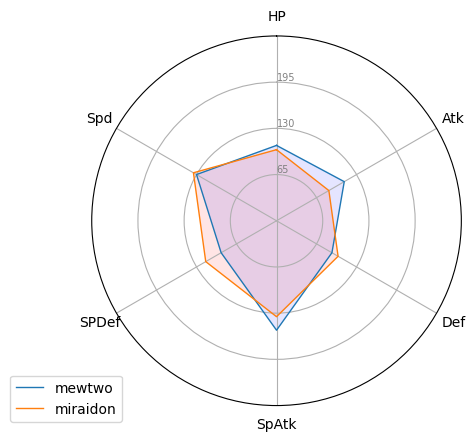

In [5]:
plot_spider(150, 1008, comp = True)

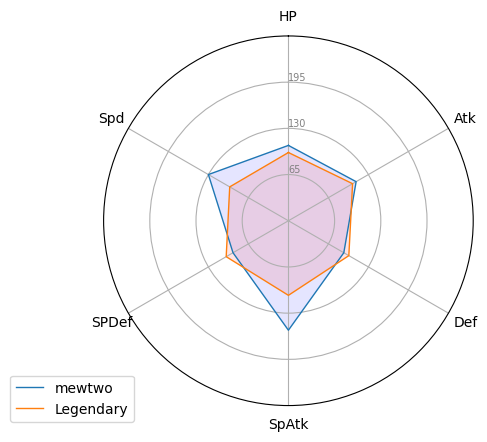

In [6]:
plot_spider(150, "Rarity", comp = True)

In [4]:
def plot_scatter(ax1, ax2, colors, id = []):
    pokedex = pd.read_csv(f"{path}\Dataframe\pokedex.csv").set_index("id")
    if id:
        pokedex = pokedex.drop(pokedex[~pokedex[colors].isin(id)].index)
    sns.lmplot(x = ax1, y = ax2, data = pokedex, fit_reg = False, hue = colors, legend = True)

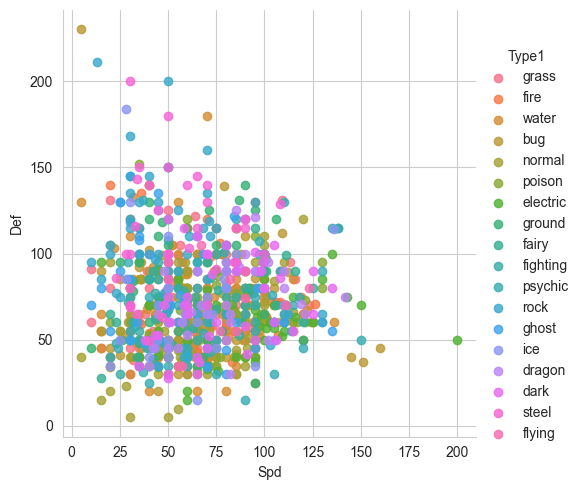

In [89]:
plot_scatter("Spd", "Def", "Type1")

In [5]:
def plot_hist(ax):
    pokedex = pd.read_csv(f"{path}\Dataframe\pokedex.csv").set_index("id")
    sns.histplot(data = pokedex, x = ax)
    if ax == "Type1" or ax == "Type2":
        plt.xticks(rotation = 90)
    plt.show()

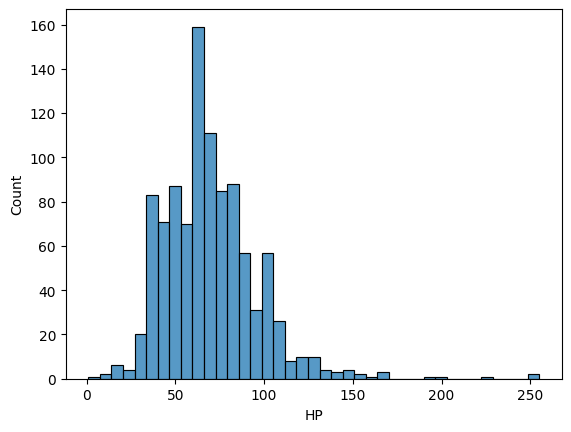

In [65]:
plot_hist("HP")

In [6]:
def corr_plot():
    pokedex = pd.read_csv(f"{path}\Dataframe\pokedex.csv").set_index("id")
    pokedex = pokedex.drop(["Name", "Type1", "Type2", "Rarity"], axis = 1)
    sns.set_style("whitegrid")
    plt.figure(figsize=(10,10))
    sns.heatmap(pokedex.corr(), annot = True, cmap = "Reds")

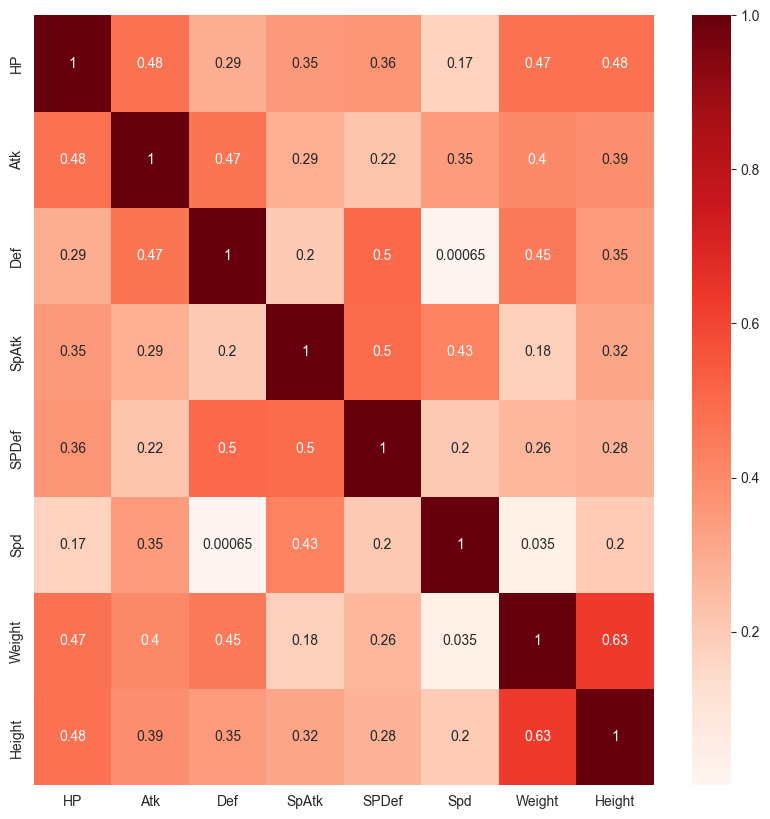

In [67]:
corr_plot()

In [85]:
def get_highest(id):
    pokedex = pd.read_csv(f"{path}\Dataframe\pokedex.csv").set_index("id")

    categories = ["HP", "Atk", "Def", "SpAtk", "SPDef", "Spd"]
    angles, ax = createBG(categories)
    if id == "Total":
        pokedex["Total"] = (pokedex["Atk"] + pokedex["Def"] + pokedex["HP"] + pokedex["SpAtk"]
                            + pokedex["SPDef"] + pokedex["Spd"]) / 6

    pokedex.sort_values(by = [id], ascending = False, inplace = True)
    values = pokedex.iloc[0][categories].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label = pokedex.iloc[0]["Name"])
    ax.fill(angles, values, 'b', alpha=0.1)
    plt.title(f"Highest {id}")
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()

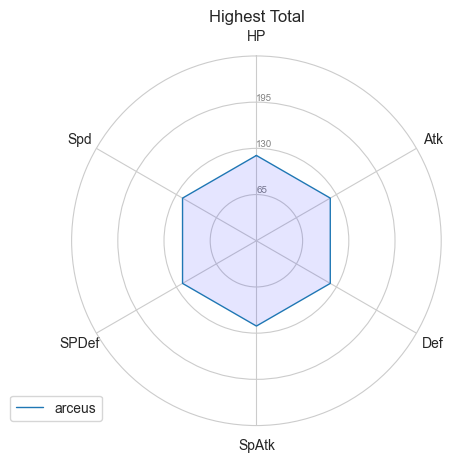

In [86]:
get_highest("Total")

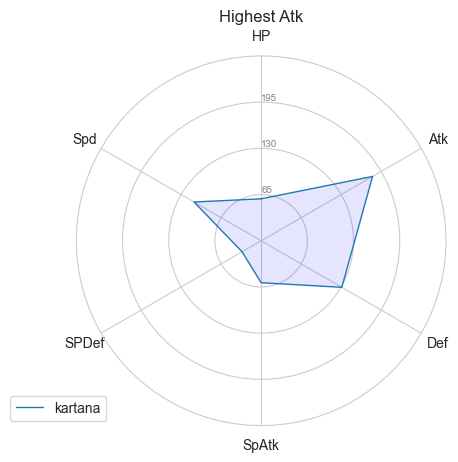

In [87]:
get_highest("Atk")

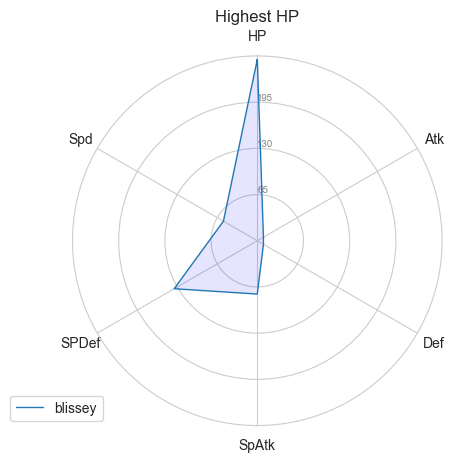

In [88]:
get_highest("HP")